<a href="https://colab.research.google.com/github/juliosaopedro/Meus_Projetos/blob/master/Previs%C3%A3o_de_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objetivo
Analisar conjunto de dados para criar modelo para previsão de resultado para diabetes

### O que é diabetes?
De acordo com o NIH, "O diabetes é uma doença que ocorre quando a glicose no sangue, também chamada de açúcar no sangue, está muito alta. A glicose no sangue é sua principal fonte de energia e vem dos alimentos que você ingere. A insulina, um hormônio produzido pelo pâncreas, ajuda a glicose dos alimentos a entrar nas células para ser usada como energia. Às vezes, seu corpo não produz insulina suficiente, ou nenhuma, ou não usa bem a insulina. A glicose fica no sangue e não chega às células.

Com o tempo, o excesso de glicose no sangue pode causar problemas de saúde. Embora o diabetes não tenha cura, você pode tomar medidas para controlá-lo e permanecer saudável.

Às vezes, as pessoas chamam o diabetes de "um toque de açúcar" ou "diabetes limítrofe". Esses termos sugerem que alguém não tem realmente diabetes ou tem um caso menos sério, mas todo caso de diabetes é sério.

Quais são os diferentes tipos de diabetes? Os tipos mais comuns de diabetes são diabetes tipo 1, tipo 2 e diabetes gestacional.

**Diabetes tipo 1** Se você tem diabetes tipo 1, seu corpo não produz insulina. Seu sistema imunológico ataca e destrói as células do pâncreas que produzem insulina. O diabetes tipo 1 geralmente é diagnosticado em crianças e adultos jovens, embora possa aparecer em qualquer idade. Pessoas com diabetes tipo 1 precisam tomar insulina todos os dias para se manterem vivas.

**Diabetes tipo 2** Se você tem diabetes tipo 2, seu corpo não produz ou usa insulina bem. Você pode desenvolver diabetes tipo 2 em qualquer idade, mesmo durante a infância. No entanto, esse tipo de diabetes ocorre com mais frequência em pessoas de meia-idade e mais velhas. O tipo 2 é o tipo mais comum de diabetes.

**Diabetes gestacional** O diabetes gestacional se desenvolve em algumas mulheres durante a gravidez. Na maioria das vezes, esse tipo de diabetes desaparece após o nascimento do bebê. No entanto, se você teve diabetes gestacional, tem uma chance maior de desenvolver diabetes tipo 2 mais tarde na vida. Às vezes, o diabetes diagnosticado durante a gravidez é, na verdade, diabetes tipo 2.

**Outros tipos de diabetes** Os tipos menos comuns incluem o diabetes monogênico, que é uma forma hereditária de diabetes, e o diabetes relacionado à fibrose cística. " 
Mais sobre o texto originalÉ necessário fornecer o texto original para ver mais informações sobre a tradução
Enviar feedback
Painéis laterais

In [ ]:
# Instalando a biblioteca pycaret
!pip install pycaret

In [3]:
# Importando as bibliotecas dos modelos de regressao
from pycaret.regression import *

In [4]:
# Importando a biblioteca pandas
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py

In [5]:
# Importando nossos dados
df = pd.read_csv('/content/test_diabetes.csv', sep=',')

In [6]:
# Nossos dados
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,NaN,40.0,35.0,168.0,43.1,2.288,NaN,1


## Qual é a taxa de distribuição?

O gráfico acima mostra que os dados estão desequilibrados. O número de não diabéticos é 268 o número de pacientes diabéticos é 500

In [7]:
# 2 datasets
D = df[(df['Outcome'] != 0)]
H = df[(df['Outcome'] == 0)]

#------------COUNT-----------------------
def target_count():
    trace = go.Bar( x = df['Outcome'].value_counts().values.tolist(), 
                    y = ['healthy','diabetic' ], 
                    orientation = 'h', 
                    text=df['Outcome'].value_counts().values.tolist(), 
                    textfont=dict(size=15),
                    textposition = 'auto',
                    opacity = 0.8,marker=dict(
                    color=['lightskyblue', 'gold'],
                    line=dict(color='#000000',width=1.5)))

    layout = dict(title =  'Count of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

#------------PERCENTAGE-------------------
def target_percent():
    trace = go.Pie(labels = ['healthy','diabetic'], values = df['Outcome'].value_counts(), 
                   textfont=dict(size=15), opacity = 0.8,
                   marker=dict(colors=['lightskyblue', 'gold'], 
                               line=dict(color='#000000', width=1.5)))


    layout = dict(title =  'Distribution of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

target_count()
target_percent()

### Análise Exploratória de Dados

In [8]:
# Tratando os dadas para eliminar os valores nulos
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['DiabetesPedigreeFunction'].fillna(df['DiabetesPedigreeFunction'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)
df['Age'].fillna(df['Age'].median(), inplace = True)
df['Pregnancies'].fillna(df['Pregnancies'].median(), inplace = True)

In [9]:
# Verificando os valores nulo
print("\nValores Nulos:")
print((df.isnull().sum() / df.shape[0]).sort_values(ascending=False))


Valores Nulos:
Outcome                     0.0
Age                         0.0
DiabetesPedigreeFunction    0.0
BMI                         0.0
Insulin                     0.0
SkinThickness               0.0
BloodPressure               0.0
Glucose                     0.0
Pregnancies                 0.0
dtype: float64


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff

In [11]:
def dist_box(data):
    # função plota um gráfico combinado para análise univariada de variável contínua para verificar a disposição, 
    # a tendência central, a dispersão e outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    fig.suptitle("DISPOSIÇÃO DOS DADOS POR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
    sns.distplot(data,kde=False,color='blue',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Média':mean,'Mediana':median,'Moda':mode})

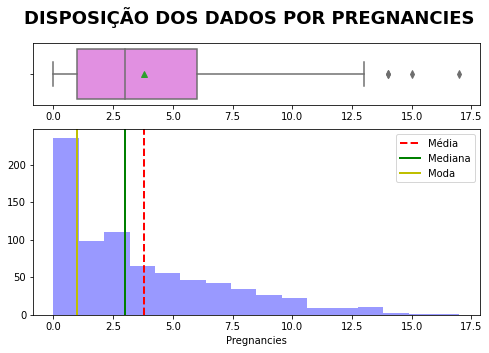

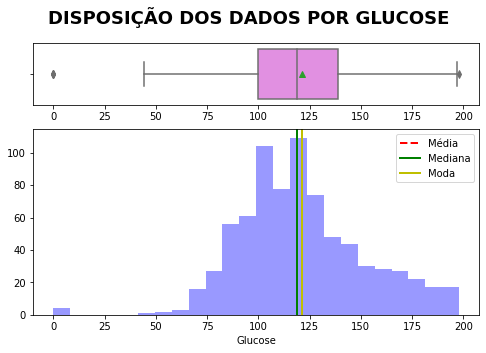

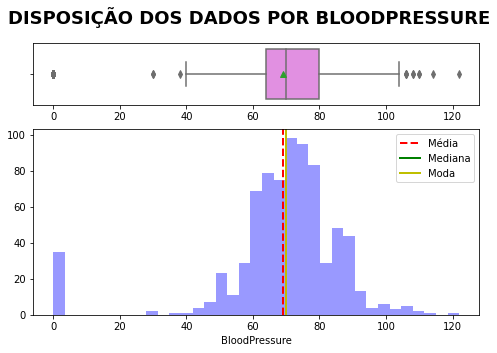

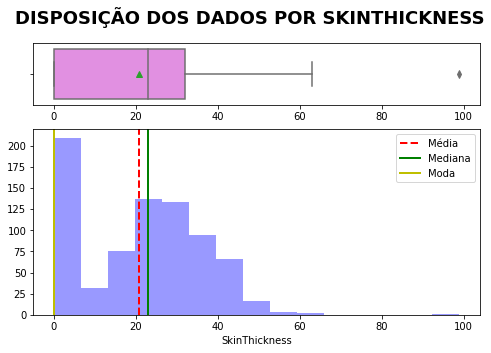

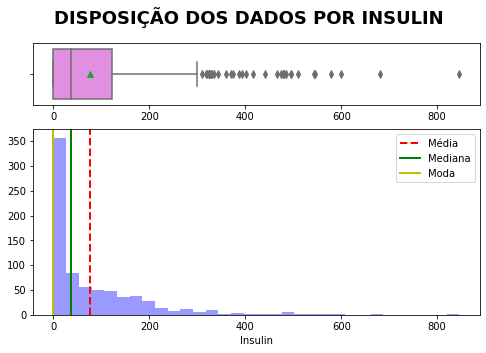

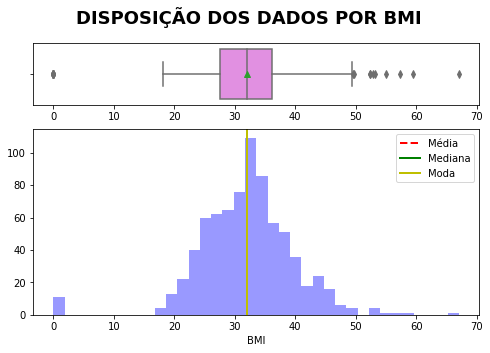

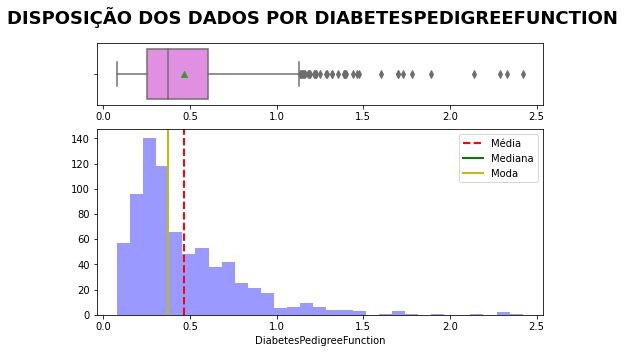

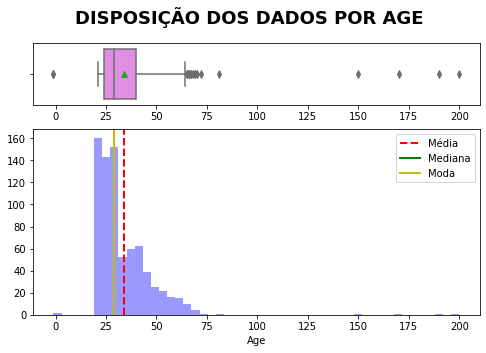

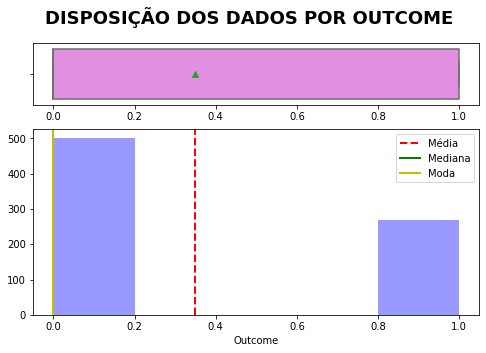

In [12]:
# Plotar o gráfico para cada coluna para verificar a disposição dos dados
list_col=  df.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    dist_box(df[list_col[i]])

In [13]:
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [14]:
# Analisando nossos dados com relação à incidência de diabetes
def plot_distribution(data_select, size_bin) :  
    # 2 datasets

    D = df[(df['Outcome'] != 0)]
    H = df[(df['Outcome'] == 0)]

    tmp1 = D[data_select]
    tmp2 = H[data_select]

    hist_data = [tmp1, tmp2]
    
    group_labels = ['diabetic', 'healthy']
    colors = ['lightskyblue', 'gold']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_select)

    py.iplot(fig, filename = 'Density plot')

### Analisando a Glicose
- Glicose : Concentração de glicose plasmática a 2 horas em um teste oral de tolerância à glicose

In [15]:
plot_distribution('Glucose', 0)

In [16]:
median_target('Glucose')

,Outcome,Glucose
0,0,109.0
1,1,138.0


#### Valor de 109 para Glicose indica pessoa saudável e 138 para diabético

### BMI - Indice de massa corporal

In [ ]:
plot_distribution('BMI', 0)

In [ ]:
median_target('BMI')

,Outcome,BMI
0,0,30.75
1,1,34.00


#### Indice de massa corporal menor que 30.75 saudável, maior que 34 diabético

### Idade

In [ ]:
plot_distribution('Age', 0)

In [ ]:
median_target('Age')

,Outcome,Age
0,0,27.0
1,1,35.0


### Número de Gravidezes

In [ ]:
plot_distribution('Pregnancies', 0)

In [ ]:
median_target('Pregnancies')

,Outcome,Pregnancies
0,0,2.5
1,1,4.0


### Salvando nosso conjunto de dados tratado

In [17]:
# Salvando nosso conjunto de dados tratado
df.to_csv('test_diabetes_clean.csv')

In [18]:
# Utilizando a biblioteca
from pycaret.datasets import get_data

In [19]:
# Importando nosso dataset tratado
dados = get_data("test_diabetes_clean")

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,3.0,148.000000,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1,1.0,85.000000,66.0,29.0,0.0,26.6,0.351,31.0,0
2,2,8.0,183.000000,64.0,0.0,0.0,23.3,0.672,32.0,1
3,3,1.0,89.000000,66.0,23.0,94.0,28.1,0.167,21.0,0
4,4,0.0,121.152055,40.0,35.0,168.0,43.1,2.288,29.0,1


In [20]:
# Verificando os tipos de nossos dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    float64
 2   Glucose                   768 non-null    float64
 3   BloodPressure             768 non-null    float64
 4   SkinThickness             768 non-null    float64
 5   Insulin                   768 non-null    float64
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    float64
 9   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [21]:
# Copia dos dados
dados_cp = dados[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']].copy()

In [22]:
# Verificando os dados copiados
dados_cp.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3.0,148.000000,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.000000,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.000000,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.000000,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,121.152055,40.0,35.0,168.0,43.1,2.288,29.0,1


In [23]:
# Configurações de pre-processamento e validação dos modelos que serão utilizados
#     data : nossos dados
#     target : variável de avaliação 
#     normalize : padronização dos dados
#     combine_rare_levels : combinar os valores raros em um grupo apenas
#     remove_outliers : remover ou não os outliers

regressao = setup ( data = dados_cp,
                   target = 'Outcome',
                   normalize = True,
                   combine_rare_levels = True,
                   remove_outliers = True,
                   session_id = 1
 )


,Description,Value
0,session_id,1
1,Target,Outcome
2,Original Data,"(768, 9)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(510, 8)"


In [24]:
# Listando os modelos disponiveis
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [25]:
# Criando nosso modelo Bayesian Ridge
bayesian = create_model('br', fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3901,0.2081,0.4562,-0.1567,-0.0,0.6374
1,0.3817,0.1926,0.4388,0.2294,-0.0,0.5051
2,0.3092,0.1413,0.3760,0.2558,-0.0,0.5391
3,0.3655,0.1802,0.4245,0.2110,-0.0,0.5566
4,0.3246,0.1540,0.3924,0.1444,-0.0,0.4486
5,0.3029,0.1268,0.3560,0.3894,-0.0,0.4197
6,0.3634,0.1763,0.4199,0.2458,-0.0,0.5326
7,0.3874,0.2073,0.4553,0.0921,-0.0,0.5425
8,0.3321,0.1591,0.3988,0.2843,-0.0,0.5133
9,0.3498,0.1608,0.4009,0.3123,-0.0,0.4561


In [26]:
# Otimizando o nosso modelo
bayesian_tunada = tune_model(bayesian, optimize='RMSE', n_iter=20)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3900,0.2080,0.4561,-0.1561,-0.0,0.6374
1,0.3819,0.1926,0.4389,0.2291,-0.0,0.5054
2,0.3093,0.1413,0.3759,0.2558,-0.0,0.5393
3,0.3656,0.1802,0.4245,0.2109,-0.0,0.5569
4,0.3248,0.1540,0.3924,0.1444,-0.0,0.4491
5,0.3030,0.1268,0.3560,0.3894,-0.0,0.4202
6,0.3635,0.1763,0.4199,0.2457,-0.0,0.5329
7,0.3874,0.2073,0.4553,0.0924,-0.0,0.5427
8,0.3321,0.1590,0.3988,0.2843,-0.0,0.5135
9,0.3499,0.1608,0.4010,0.3122,-0.0,0.4565


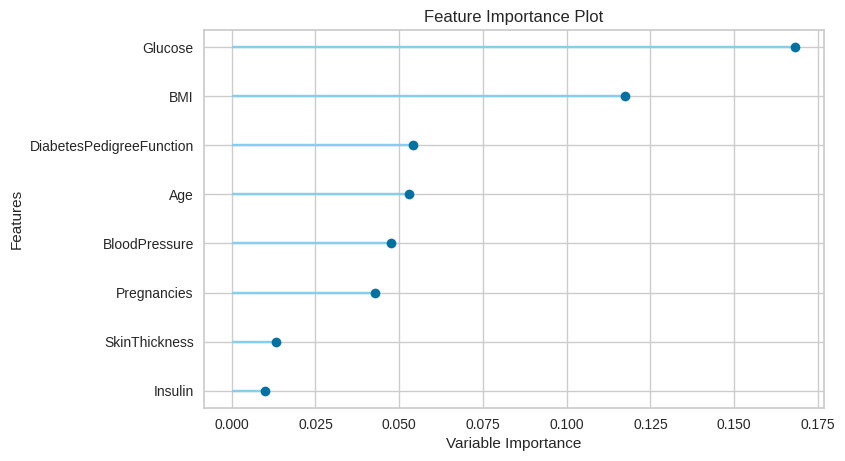

In [27]:
# Importancia das variáveis de acordo com a Bayesian Ridge (bayesian_tunada)
plot_model(bayesian_tunada, plot = 'feature')

### Avaliando os modelos

In [28]:
# Comparando os modelos e ordenando por R2
modelos = compare_models(sort = 'R2', n_select = 5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.3507,0.1706,0.4119,0.2008,0.0,0.5151,0.015
ridge,Ridge Regression,0.3487,0.1710,0.4123,0.1987,0.0,0.5077,0.016
lr,Linear Regression,0.3487,0.1710,0.4123,0.1986,0.0,0.5073,0.016
lar,Least Angle Regression,0.3487,0.1710,0.4123,0.1986,0.0,0.5073,0.019
rf,Random Forest Regressor,0.3234,0.1725,0.4142,0.1951,0.0,0.4823,0.492
et,Extra Trees Regressor,0.3311,0.1736,0.4157,0.1884,0.0,0.4996,0.415
ada,AdaBoost Regressor,0.3682,0.1741,0.4165,0.1826,0.0,0.4984,0.052
gbr,Gradient Boosting Regressor,0.3277,0.1757,0.4174,0.1802,0.0,0.4807,0.097
huber,Huber Regressor,0.3399,0.1766,0.4187,0.1746,0.0,0.5200,0.019
omp,Orthogonal Matching Pursuit,0.3675,0.1814,0.4246,0.1564,0.0,0.5489,0.016


In [29]:
# Nossos 5 primeiros modelos selecionados
modelos

[BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
               compute_score=False, copy_X=True, fit_intercept=True,
               lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
               normalize=False, tol=0.001, verbose=False),
 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=1, solver='auto', tol=0.001),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False),
 Lars(copy_X=True, eps=2.220446049250313e-16, fit_intercept=True, fit_path=True,
      jitter=None, n_nonzero_coefs=500, normalize=True, precompute='auto',
      random_state=1, verbose=False),
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_spl

In [30]:
# Otimizando nosso modelo
modelos_tunados = [tune_model(i, optimize='RMSE') for i in modelos]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3643,0.2002,0.4474,-0.1126,-0.0,0.6077
1,0.3403,0.1854,0.4306,0.2581,-0.0,0.4687
2,0.2987,0.1465,0.3827,0.2287,-0.0,0.5178
3,0.3367,0.1753,0.4187,0.2324,-0.0,0.5178
4,0.3126,0.1622,0.4027,0.0988,-0.0,0.4732
5,0.2553,0.1188,0.3447,0.4276,-0.0,0.3965
6,0.3455,0.1930,0.4394,0.1742,-0.0,0.5266
7,0.3298,0.1792,0.4233,0.2155,-0.0,0.4655
8,0.3065,0.1591,0.3989,0.2840,-0.0,0.5120
9,0.3341,0.1707,0.4132,0.2696,-0.0,0.4841


In [31]:
# Combinando os modelos
modelo_combinado = blend_models(modelos_tunados)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3842,0.2051,0.4528,-0.1396,-0.0,0.6320
1,0.3709,0.1869,0.4323,0.2521,-0.0,0.4929
2,0.3053,0.1407,0.3752,0.2590,-0.0,0.5323
3,0.3582,0.1767,0.4203,0.2264,-0.0,0.5459
4,0.3195,0.1526,0.3906,0.1519,-0.0,0.4465
5,0.2913,0.1195,0.3457,0.4245,-0.0,0.4075
6,0.3573,0.1755,0.4190,0.2491,-0.0,0.5279
7,0.3750,0.1997,0.4468,0.1258,-0.0,0.5247
8,0.3255,0.1565,0.3956,0.2959,-0.0,0.5091
9,0.3449,0.1584,0.3979,0.3226,-0.0,0.4562


In [32]:
# Verificando a performance nos dados de validação
pred = predict_model(modelo_combinado)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.3244,0.1521,0.39,0.346,0.2706,0.4596


In [33]:
# Aplicando o modelo final em todos os dados disponíveis
modelo_final = finalize_model(modelo_combinado)

In [34]:
# Salvando meu modelo
save_model(modelo_final, 'meu_modelo_final')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Outcome',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                                                     ccp_alpha=0.0,
                                                                     criterion='mse',
                                                                     max_depth=10,
                                                            

In [35]:
# Deploy Básico com aplicação de uma rentabilidade 80% sobre o valor de custo


def Diabetes(Pregnancies,	
                 Glucose,
                 BloodPressure,
                 SkinThickness,
                 Insulin,
                 BMI,
                 DiabetesPedigreeFunction,
                 Age):
  dados0 = {'Pregnancies':[Pregnancies],
            'Glucose':[Glucose],
            'BloodPressure':[BloodPressure],
            'SkinThickness':[SkinThickness],
            'Insulin':[Insulin],
            'BMI':[BMI],
            'DiabetesPedigreeFunction':[DiabetesPedigreeFunction],
            'Age':[Age]

  }
  dados = pd.DataFrame(dados0)

  modelo = load_model('/content/meu_modelo_final')
  
  pred = float(predict_model(modelo, data = dados)['Label'].round(2))
  
  valor = round(1.8 * pred,2)

  print ('');

  print(pred)  
  
  if pred > 0.5:
     print('Chance de Diabetes')

  else:
    print('Pouca chance de Diabetes')
  

In [36]:
# Aplicando nosso modelo
Diabetes(Pregnancies='3.0',	Glucose='148.000000',	BloodPressure='72.0',	SkinThickness='35.0', Insulin='0.0', BMI='33.6', DiabetesPedigreeFunction='0.627', Age='50.0')

Transformation Pipeline and Model Successfully Loaded

0.59
Chance de Diabetes
